In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import torch
from torch import nn


In [56]:
data = load_breast_cancer()

x = data.data[:,(0,1)] # radius and texture
y = data.target

x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [57]:
#train the model
class breast_cancer(nn.Module):
    def __init__(self):
        super(breast_cancer, self).__init__()
        self.layer1 = nn.Linear(in_features=2,out_features=16)
        self.layer2 = nn.Linear(in_features=16,out_features=8)
        self.layer3 = nn.Linear(in_features=8,out_features=1)
        
    def forward(self, x):
        y_pred = torch.relu(self.layer1(x))
        y_pred = torch.relu(self.layer2(y_pred))
        y_pred = torch.sigmoid(self.layer3(y_pred))
        return y_pred


In [60]:
torch.manual_seed(42)
model = breast_cancer()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
lossfn = nn.BCELoss()
epoch_count = []
loss_values = []
test_loss_values = []
epochs = 1000
for epoch in range(epochs):
    model.train()
    y_pred = model(x_train)
    loss = lossfn(y_pred.squeeze(), y_train)
    loss_values.append(loss.detach().numpy())
    optimizer.zero_grad()

    loss.backward()
    optimizer.step()
        
        
    model.eval()
    with torch.inference_mode():
        test_preds = model(x_test)
        test_loss = lossfn(test_preds.squeeze(), y_test)
        test_loss_values.append(test_loss)
        epoch_count.append(epoch)
        

    if epoch % 100 ==0 :
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.7697159647941589 | Test Loss: 0.7818252444267273
Epoch: 100 | Loss: 0.6961266994476318 | Test Loss: 0.7026557922363281
Epoch: 200 | Loss: 0.6826361417770386 | Test Loss: 0.6883871555328369
Epoch: 300 | Loss: 0.6713431477546692 | Test Loss: 0.6765552163124084
Epoch: 400 | Loss: 0.6616474986076355 | Test Loss: 0.6660116314888
Epoch: 500 | Loss: 0.6532332301139832 | Test Loss: 0.6564658284187317
Epoch: 600 | Loss: 0.6459029316902161 | Test Loss: 0.6478387713432312
Epoch: 700 | Loss: 0.6392843723297119 | Test Loss: 0.639723539352417
Epoch: 800 | Loss: 0.633310079574585 | Test Loss: 0.6319090127944946
Epoch: 900 | Loss: 0.6279677152633667 | Test Loss: 0.6247057318687439


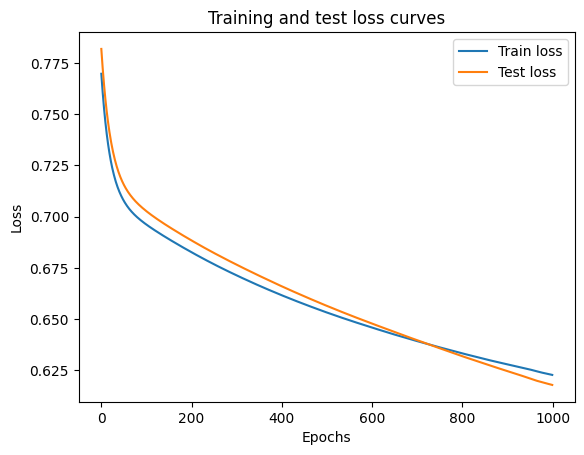

In [61]:
plt.plot(epoch_count, loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()